In [1]:
!pip install deepxde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 13.2 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt          # For Plot
import numpy                             # Array and math functions handling
import deepxde as dde                    # library for PINN
import tensorflow as tf                  # For handling tensor, running program in gpu and Machine Learning
from scipy.interpolate import griddata   # To form a grid of data

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Enable just-in-time compilation with XLA.



In [3]:
def domain (x_lower, x_upper, t_lower, t_upper) :
    x = numpy.linspace (x_lower, x_upper, 520)
    t = numpy.linspace (t_lower, t_upper, 400)
    X, T = numpy.meshgrid(x, t)
    X_star = numpy.hstack((X.flatten()[:, None], T.flatten()[:, None]))
    space_domain = dde.geometry.Interval(x_lower, x_upper)
    time_domain = dde.geometry.TimeDomain(t_lower, t_upper)
    geomtime = dde.geometry.GeometryXTime(space_domain, time_domain)
    return geomtime, X, T, X_star

In [4]:
def derivative (y, x) :
    u_t = dde.grad.jacobian (y, x, j = 1)
    u_x = dde.grad.jacobian (y, x, j = 0)
    u_xxx = dde.grad.hessian (u_x, x, j = 0)
    return u_t, u_x, u_xxx

In [5]:
def pde (x, y) :
    u = y[:, 0:1]
    v = y[:, 1:2]
    #u1 = y[:, 2:3]
    #v1 = y[:, 3:4]

    u_t, u_x, u_xxx = derivative (u, x)
    v_t, v_x, v_xxx = derivative (v, x)

    f_u = u_t + 6*u**2*u_x + 6*v**2*u_x + u_xxx
    f_v = v_t + 6*u**2*v_x + 6*v**2*v_x + v_xxx
    #f_x = u1 - u_t
    #f_y = v1 - v_t

    return f_u, f_v, #f_x, f_y

In [6]:
def num (x, t) :

    den = ( ( numpy.e )**( 48 * ( b )**( 3 ) * t ) + ( ( numpy.e )**( 12 * b * \
( 12 * ( a )**( 2 ) * t + x ) ) + ( ( numpy.e )**( 8 * b * ( 12 * ( a \
)**( 2 ) * t + ( 2 * ( b )**( 2 ) * t + x ) ) ) * ( 3 + ( 331776 * ( \
b )**( 9 ) * ( t )**( 3 ) + ( 1327104 * ( a )**( 8 ) * ( b )**( 4 ) * \
( t )**( 4 ) + ( 1327104 * ( b )**( 12 ) * ( t )**( 4 ) + ( -64512 * \
( b )**( 7 ) * ( t )**( 2 ) * x + ( -442368 * ( b )**( 10 ) * ( t \
)**( 3 ) * x + ( 48 * ( b )**( 2 ) * ( x )**( 2 ) + ( 3840 * ( b )**( \
5 ) * t * ( x )**( 2 ) + ( 55296 * ( b )**( 8 ) * ( t )**( 2 ) * ( x \
)**( 2 ) + ( -64 * ( b )**( 3 ) * ( x )**( 3 ) + ( 110592 * ( a )**( \
6 ) * ( b )**( 3 ) * ( t )**( 3 ) * ( -1 + ( 48 * ( b )**( 3 ) * t + \
4 * b * x ) ) + ( 6912 * ( a )**( 4 ) * ( b )**( 2 ) * ( t )**( 2 ) * \
( 1 + ( -112 * ( b )**( 3 ) * t + ( 1152 * ( b )**( 6 ) * ( t )**( 2 \
) + ( -4 * b * x + ( 64 * ( b )**( 4 ) * t * x + 8 * ( b )**( 2 ) * ( \
x )**( 2 ) ) ) ) ) ) + ( 768 * ( b )**( 6 ) * t * ( 33 * t + -4 * ( x \
)**( 3 ) ) + ( -64 * ( b )**( 4 ) * ( 30 * t * x + -1 * ( x )**( 4 ) \
) + 384 * ( a )**( 2 ) * ( b )**( 2 ) * t * ( -864 * ( b )**( 5 ) * ( \
t )**( 2 ) + ( 13824 * ( b )**( 8 ) * ( t )**( 3 ) + ( 3 * x + ( -48 \
* ( b )**( 3 ) * t * x + ( -1152 * ( b )**( 6 ) * ( t )**( 2 ) * x + \
( -6 * b * ( x )**( 2 ) + ( -96 * ( b )**( 4 ) * t * ( x )**( 2 ) + ( \
b )**( 2 ) * ( 84 * t + 8 * ( x )**( 3 ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) \
) ) ) ) ) ) ) ) + ( numpy.e )**( 4 * b * ( 12 * ( a )**( 2 ) * t + ( \
8 * ( b )**( 2 ) * t + x ) ) ) * ( 3 + ( -331776 * ( b )**( 9 ) * ( t \
)**( 3 ) + ( 1327104 * ( a )**( 8 ) * ( b )**( 4 ) * ( t )**( 4 ) + ( \
1327104 * ( b )**( 12 ) * ( t )**( 4 ) + ( 64512 * ( b )**( 7 ) * ( t \
)**( 2 ) * x + ( -442368 * ( b )**( 10 ) * ( t )**( 3 ) * x + ( 48 * \
( b )**( 2 ) * ( x )**( 2 ) + ( -3840 * ( b )**( 5 ) * t * ( x )**( 2 \
) + ( 55296 * ( b )**( 8 ) * ( t )**( 2 ) * ( x )**( 2 ) + ( 64 * ( b \
)**( 3 ) * ( x )**( 3 ) + ( 110592 * ( a )**( 6 ) * ( b )**( 3 ) * ( \
t )**( 3 ) * ( 1 + ( 48 * ( b )**( 3 ) * t + 4 * b * x ) ) + ( 6912 * \
( a )**( 4 ) * ( b )**( 2 ) * ( t )**( 2 ) * ( 1 + ( 112 * ( b )**( 3 \
) * t + ( 1152 * ( b )**( 6 ) * ( t )**( 2 ) + ( 4 * b * x + ( 64 * ( \
b )**( 4 ) * t * x + 8 * ( b )**( 2 ) * ( x )**( 2 ) ) ) ) ) ) + ( \
768 * ( b )**( 6 ) * t * ( 33 * t + -4 * ( x )**( 3 ) ) + ( -64 * ( b \
)**( 4 ) * ( 30 * t * x + -1 * ( x )**( 4 ) ) + 384 * ( a )**( 2 ) * \
( b )**( 2 ) * t * ( 864 * ( b )**( 5 ) * ( t )**( 2 ) + ( 13824 * ( \
b )**( 8 ) * ( t )**( 3 ) + ( 3 * x + ( 48 * ( b )**( 3 ) * t * x + ( \
-1152 * ( b )**( 6 ) * ( t )**( 2 ) * x + ( 6 * b * ( x )**( 2 ) + ( \
-96 * ( b )**( 4 ) * t * ( x )**( 2 ) + ( b )**( 2 ) * ( 84 * t + 8 * \
( x )**( 3 ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) )

    re1 = -4 * b * ( numpy.e )**( 2 * b * ( 12 * ( a )**( 2 ) * t + ( 4 * ( b \
)**( 2 ) * t + x ) ) ) * ( ( -1 * ( numpy.e )**( 32 * ( b )**( 3 ) * \
t ) * ( 3 + ( -240 * ( b )**( 3 ) * t + ( 1152 * ( a )**( 4 ) * ( b \
)**( 2 ) * ( t )**( 2 ) + ( 1152 * ( b )**( 6 ) * ( t )**( 2 ) + ( 12 \
* b * x + ( -192 * ( b )**( 4 ) * t * x + ( 8 * ( b )**( 2 ) * ( x \
)**( 2 ) + -48 * ( a )**( 2 ) * b * t * ( -3 + ( 144 * ( b )**( 3 ) * \
t + -4 * b * x ) ) ) ) ) ) ) ) ) + ( -1 * ( numpy.e )**( 8 * b * ( 12 \
* ( a )**( 2 ) * t + x ) ) * ( 3 + ( 240 * ( b )**( 3 ) * t + ( 1152 \
* ( a )**( 4 ) * ( b )**( 2 ) * ( t )**( 2 ) + ( 1152 * ( b )**( 6 ) \
* ( t )**( 2 ) + ( -12 * b * x + ( -192 * ( b )**( 4 ) * t * x + ( 8 \
* ( b )**( 2 ) * ( x )**( 2 ) + -48 * ( a )**( 2 ) * b * t * ( 3 + ( \
144 * ( b )**( 3 ) * t + -4 * b * x ) ) ) ) ) ) ) ) ) + 2 * ( numpy.e \
)**( 4 * b * ( 12 * ( a )**( 2 ) * t + ( 4 * ( b )**( 2 ) * t + x ) ) \
) * ( -3 + ( 663552 * ( a )**( 8 ) * ( b )**( 4 ) * ( t )**( 4 ) + ( \
663552 * ( b )**( 12 ) * ( t )**( 4 ) + ( -221184 * ( b )**( 10 ) * ( \
t )**( 3 ) * x + ( 16 * ( b )**( 2 ) * ( x )**( 2 ) + ( 27648 * ( b \
)**( 8 ) * ( t )**( 2 ) * ( x )**( 2 ) + ( 221184 * ( a )**( 6 ) * ( \
b )**( 4 ) * ( t )**( 3 ) * ( 12 * ( b )**( 2 ) * t + x ) + ( 2304 * \
( a )**( 4 ) * ( b )**( 2 ) * ( t )**( 2 ) * ( 1 + ( 1728 * ( b )**( \
6 ) * ( t )**( 2 ) + ( 96 * ( b )**( 4 ) * t * x + 12 * ( b )**( 2 ) \
* ( x )**( 2 ) ) ) ) + ( 768 * ( b )**( 6 ) * t * ( 3 * t + -2 * ( x \
)**( 3 ) ) + ( 32 * ( b )**( 4 ) * x * ( -24 * t + ( x )**( 3 ) ) + \
384 * ( a )**( 2 ) * ( b )**( 2 ) * t * ( 6912 * ( b )**( 8 ) * ( t \
)**( 3 ) + ( x + ( -576 * ( b )**( 6 ) * ( t )**( 2 ) * x + ( -48 * ( \
b )**( 4 ) * t * ( x )**( 2 ) + 4 * ( b )**( 2 ) * ( -3 * t + ( x \
)**( 3 ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) * numpy.cos( 2 * a * ( 4 * \
( a )**( 2 ) * t + ( -12 * ( b )**( 2 ) * t + x ) ) ) + -384 * a * ( \
b )**( 2 ) * t * ( ( numpy.e )**( 8 * b * ( 12 * ( a )**( 2 ) * t + x \
) ) * ( 1 + ( -12 * ( a )**( 2 ) * b * t + ( 12 * ( b )**( 3 ) * t + \
-1 * b * x ) ) ) + ( ( numpy.e )**( 32 * ( b )**( 3 ) * t ) * ( 1 + ( \
12 * ( a )**( 2 ) * b * t + ( -12 * ( b )**( 3 ) * t + b * x ) ) ) + \
2 * ( numpy.e )**( 4 * b * ( 12 * ( a )**( 2 ) * t + ( 4 * ( b )**( 2 \
) * t + x ) ) ) * ( 1 + ( 576 * ( a )**( 4 ) * ( b )**( 2 ) * ( t \
)**( 2 ) + ( -576 * ( b )**( 6 ) * ( t )**( 2 ) + ( 96 * ( a )**( 2 ) \
* ( b )**( 2 ) * t * x + 4 * ( b )**( 2 ) * ( x )**( 2 ) ) ) ) ) ) ) \
* numpy.sin( 2 * a * ( 4 * ( a )**( 2 ) * t + ( -12 * ( b )**( 2 ) * \
t + x ) ) ) )

    im1 = 4 * b * ( numpy.e )**( 2 * b * ( 12 * ( a )**( 2 ) * t + ( 4 * ( b \
)**( 2 ) * t + x ) ) ) * ( 384 * a * ( b )**( 2 ) * t * ( ( numpy.e \
)**( 8 * b * ( 12 * ( a )**( 2 ) * t + x ) ) * ( 1 + ( -12 * ( a )**( \
2 ) * b * t + ( 12 * ( b )**( 3 ) * t + -1 * b * x ) ) ) + ( ( \
numpy.e )**( 32 * ( b )**( 3 ) * t ) * ( 1 + ( 12 * ( a )**( 2 ) * b \
* t + ( -12 * ( b )**( 3 ) * t + b * x ) ) ) + 2 * ( numpy.e )**( 4 * \
b * ( 12 * ( a )**( 2 ) * t + ( 4 * ( b )**( 2 ) * t + x ) ) ) * ( 1 \
+ ( 576 * ( a )**( 4 ) * ( b )**( 2 ) * ( t )**( 2 ) + ( -576 * ( b \
)**( 6 ) * ( t )**( 2 ) + ( 96 * ( a )**( 2 ) * ( b )**( 2 ) * t * x \
+ 4 * ( b )**( 2 ) * ( x )**( 2 ) ) ) ) ) ) ) * numpy.cos( 2 * a * ( \
4 * ( a )**( 2 ) * t + ( -12 * ( b )**( 2 ) * t + x ) ) ) + ( -1 * ( \
numpy.e )**( 32 * ( b )**( 3 ) * t ) * ( 3 + ( -240 * ( b )**( 3 ) * \
t + ( 1152 * ( a )**( 4 ) * ( b )**( 2 ) * ( t )**( 2 ) + ( 1152 * ( \
b )**( 6 ) * ( t )**( 2 ) + ( 12 * b * x + ( -192 * ( b )**( 4 ) * t \
* x + ( 8 * ( b )**( 2 ) * ( x )**( 2 ) + -48 * ( a )**( 2 ) * b * t \
* ( -3 + ( 144 * ( b )**( 3 ) * t + -4 * b * x ) ) ) ) ) ) ) ) ) + ( \
-1 * ( numpy.e )**( 8 * b * ( 12 * ( a )**( 2 ) * t + x ) ) * ( 3 + ( \
240 * ( b )**( 3 ) * t + ( 1152 * ( a )**( 4 ) * ( b )**( 2 ) * ( t \
)**( 2 ) + ( 1152 * ( b )**( 6 ) * ( t )**( 2 ) + ( -12 * b * x + ( \
-192 * ( b )**( 4 ) * t * x + ( 8 * ( b )**( 2 ) * ( x )**( 2 ) + -48 \
* ( a )**( 2 ) * b * t * ( 3 + ( 144 * ( b )**( 3 ) * t + -4 * b * x \
) ) ) ) ) ) ) ) ) + 2 * ( numpy.e )**( 4 * b * ( 12 * ( a )**( 2 ) * \
t + ( 4 * ( b )**( 2 ) * t + x ) ) ) * ( -3 + ( 663552 * ( a )**( 8 ) \
* ( b )**( 4 ) * ( t )**( 4 ) + ( 663552 * ( b )**( 12 ) * ( t )**( 4 \
) + ( -221184 * ( b )**( 10 ) * ( t )**( 3 ) * x + ( 16 * ( b )**( 2 \
) * ( x )**( 2 ) + ( 27648 * ( b )**( 8 ) * ( t )**( 2 ) * ( x )**( 2 \
) + ( 221184 * ( a )**( 6 ) * ( b )**( 4 ) * ( t )**( 3 ) * ( 12 * ( \
b )**( 2 ) * t + x ) + ( 2304 * ( a )**( 4 ) * ( b )**( 2 ) * ( t \
)**( 2 ) * ( 1 + ( 1728 * ( b )**( 6 ) * ( t )**( 2 ) + ( 96 * ( b \
)**( 4 ) * t * x + 12 * ( b )**( 2 ) * ( x )**( 2 ) ) ) ) + ( 768 * ( \
b )**( 6 ) * t * ( 3 * t + -2 * ( x )**( 3 ) ) + ( 32 * ( b )**( 4 ) \
* x * ( -24 * t + ( x )**( 3 ) ) + 384 * ( a )**( 2 ) * ( b )**( 2 ) \
* t * ( 6912 * ( b )**( 8 ) * ( t )**( 3 ) + ( x + ( -576 * ( b )**( \
6 ) * ( t )**( 2 ) * x + ( -48 * ( b )**( 4 ) * t * ( x )**( 2 ) + 4 \
* ( b )**( 2 ) * ( -3 * t + ( x )**( 3 ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) \
) ) ) * numpy.sin( 2 * a * ( 4 * ( a )**( 2 ) * t + ( -12 * ( b )**( \
2 ) * t + x ) ) ) )

    real = re1/den
    imag = im1/den
    q = numpy.sqrt (real**2 + imag**2)
    return real, imag, q


In [7]:
def cond_u_rw (xm) :
    x = xm [:, 0:1]
    t = xm [:, 1:2]
    u, v, q = num (x, t)
    return u

def cond_v_rw (xm) :
    x = xm [:, 0:1]
    t = xm [:, 1:2]
    u, v, q = num (x, t)
    return v

def netmodel (data, neuron, layer, out) :
    net = dde.maps.FNN ([2] + [neuron] * layer + [out], 'tanh', 'Glorot normal')
    model = dde.Model (data, net)
    model.compile ('adam', lr = 1e-3, loss = 'MSE')
    return model

def bound_1 (x, on_boundary) :
    return on_boundary and numpy.isclose(x[0], xmin)

def bound_2 (x, on_boundary) :
    return on_boundary and numpy.isclose(x[0], xmax)

In [8]:
xmin = -9.5
xmax = 9.5
tmin = -9.5
tmax = 9.5
geomtime1, X1, T1, X_star1 = domain(xmin, xmax, tmin, tmax)


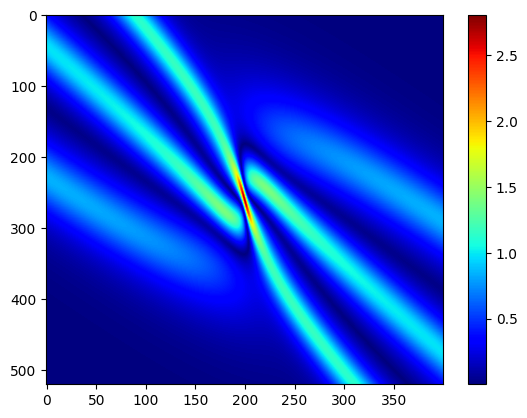

In [9]:
a = 0.02
b = 0.47
u1, v1, r11 = num (X1, T1)
plt.imshow (r11.T, aspect = "auto", cmap = "jet")
plt.colorbar ()

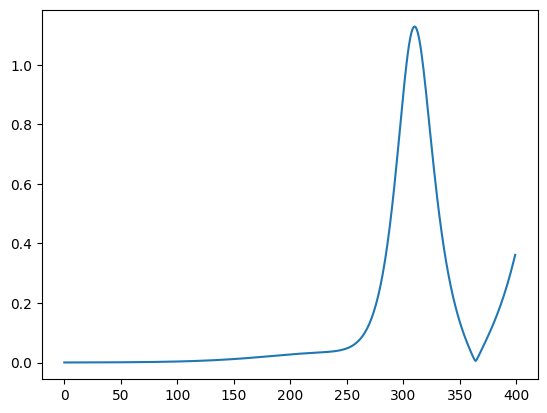

In [10]:
plt.plot(r11.T[-1])

(1900, 2)


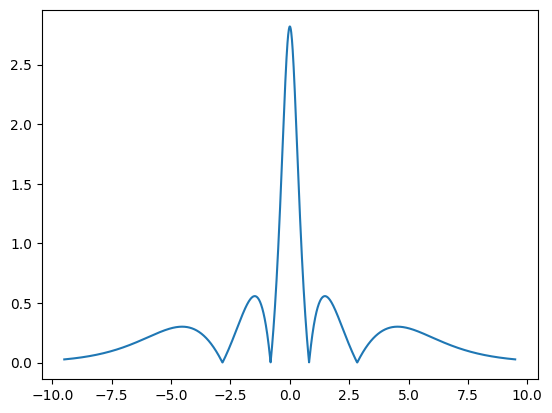

(1900, 2)


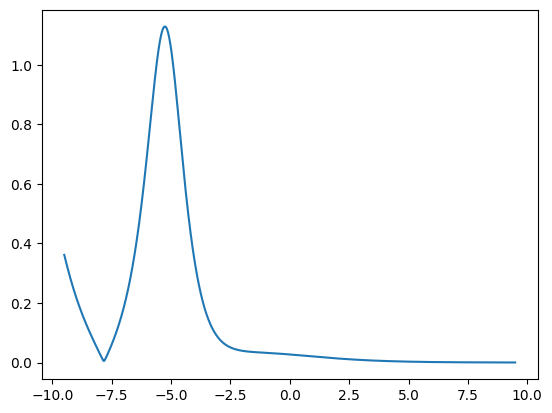

(1900, 2)


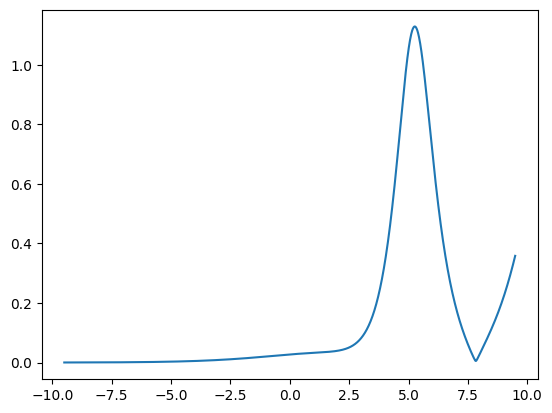

In [11]:
points = numpy.array([[i, 0] for i in numpy.arange(xmin, xmax, 0.01)])
val1 = cond_u_rw (points)
val2 = cond_v_rw (points)
qval = numpy.sqrt(val1**2 + val2**2)
print (points.shape)
plt.plot (points[:, 0], qval)
plt.show ()

points1 = numpy.array([[-9.5, i] for i in numpy.arange(tmin, tmax, 0.01)])
val11 = cond_u_rw (points1)
val21 = cond_v_rw (points1)
qval1 = numpy.sqrt(val11**2 + val21**2)
print (points.shape)
plt.plot (points1[:, 1], qval1)
plt.show ()

points2 = numpy.array([[9.5, i] for i in numpy.arange(tmin, tmax, 0.01)])
val12 = cond_u_rw (points2)
val22 = cond_v_rw (points2)
qval2 = numpy.sqrt(val12**2 + val22**2)
print (points.shape)
plt.plot (points2[:, 1], qval2)
plt.show ()


In [12]:
bc_u_0 = dde.DirichletBC (geomtime1, cond_u_rw, bound_1, component = 0)
bc_u_1 = dde.DirichletBC (geomtime1, cond_u_rw, bound_2, component = 0)
bc_v_0 = dde.DirichletBC (geomtime1, cond_v_rw, bound_1, component = 1)
bc_v_1 = dde.DirichletBC (geomtime1, cond_v_rw, bound_2, component = 1)

bc_u = dde.IC (geomtime1, cond_u_rw, lambda _, on_boundary: on_boundary, component = 0)
bc_v = dde.IC (geomtime1, cond_v_rw, lambda _, on_boundary: on_boundary, component = 1)

ic_u = dde.IC (geomtime1, cond_u_rw, lambda _, on_initial: on_initial, component = 0)
ic_v = dde.IC (geomtime1, cond_v_rw, lambda _, on_initial: on_initial, component = 1)

ic_bound1 = dde.PointSetBC(points, val1, component=0, batch_size = None, shuffle=True)
ic_bound2 = dde.PointSetBC(points, val2, component=1, batch_size = None, shuffle=True)

ic_boundnew1 = dde.PointSetBC(points1, val11, component=0, batch_size = None, shuffle=True)
ic_boundnew2 = dde.PointSetBC(points1, val21, component=1, batch_size = None, shuffle=True)

ic_boundnew11 = dde.PointSetBC(points2, val12, component=0, batch_size = None, shuffle=True)
ic_boundnew21 = dde.PointSetBC(points2, val22, component=1, batch_size = None, shuffle=True)


In [13]:
data = dde.data.TimePDE (geomtime1,
                        pde,
                        [ic_boundnew1, ic_boundnew2, ic_boundnew11, ic_boundnew21, ic_bound1,  ic_bound2], # bc_u_0, bc_v_0,
                        num_domain = 10000,
                        num_initial = 200,
                        num_boundary = 200,
                        train_distribution = "pseudo")

In [14]:
mod1 = netmodel (data, 30, 6, 2)

Compiling model...
Building feed-forward neural network...
'build' took 0.130547 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 6.714363 s



In [15]:
dde.optimizers.config.set_LBFGS_options(maxcor=50,
            ftol=1.0 * numpy.finfo(float).eps,    gtol=1e-08,    maxiter=80000,    maxfun=80000,    maxls=50,)

mod1.train(iterations=50000, display_every=1000)

mod1.compile("L-BFGS")
mod1.train()

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [8.37e-02, 1.32e-02, 1.69e-01, 6.45e-02, 4.61e-01, 6.45e-02, 2.97e-01, 6.48e-03]    [8.37e-02, 1.32e-02, 1.69e-01, 6.45e-02, 4.61e-01, 6.45e-02, 2.97e-01, 6.48e-03]    []  
1000      [6.89e-03, 8.94e-04, 3.23e-04, 1.42e-04, 3.03e-04, 1.75e-04, 2.17e-03, 1.01e-04]    [6.89e-03, 8.94e-04, 3.23e-04, 1.42e-04, 3.03e-04, 1.75e-04, 2.17e-03, 1.01e-04]    []  
2000      [8.84e-03, 6.37e-04, 2.39e-04, 1.16e-04, 2.50e-04, 1.22e-04, 7.28e-04, 5.34e-05]    [8.84e-03, 6.37e-04, 2.39e-04, 1.16e-04, 2.50e-04, 1.22e-04, 7.28e-04, 5.34e-05]    []  
3000      [3.56e-03, 4.71e-04, 2.05e-04, 1.05e-04, 1.49e-04, 1.05e-04, 4.22e-04, 3.44e-05]    [3.56e-03, 4.71e-04, 2.05e-04, 1.05e-04, 1.49e-04, 1.05e-04, 4.22e-04, 3.44e-05]    []  
4000      [4.07e-03, 4.14e-04, 1.50e-04, 9.61e-05, 1.84e-04

(<deepxde.model.LossHistory at 0x783618724a60>,
 <deepxde.model.TrainState at 0x783618724e80>)

In [16]:
# Make prediction
prediction = mod1.predict(X_star1, operator=None)

u = griddata(X_star1, prediction[:, 0], (X1, T1), method="cubic")
v = griddata(X_star1, prediction[:, 1], (X1, T1), method="cubic")

h1 = numpy.sqrt(u ** 2 + v ** 2 )

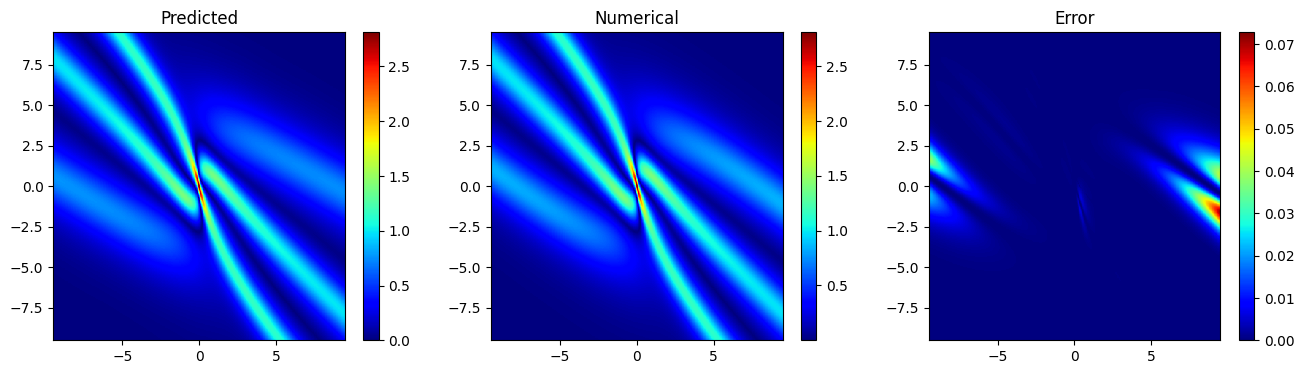

In [17]:
ext1 = [tmin, tmax, xmin, xmax]

plt.figure (figsize = (16, 4))
plt.subplot (1, 3, 1)
plt.title("Predicted")
plt.imshow(
    h1.T,
    interpolation="nearest", cmap="jet",
    extent=ext1,
    aspect="auto",vmin = 0.0,)
plt.colorbar ()

plt.subplot (1, 3, 2)
plt.title("Numerical")
plt.imshow(
    r11.T, interpolation="nearest", extent=ext1,
    cmap="jet",
    aspect="auto")
plt.colorbar ()

plt.subplot (1, 3, 3)
plt.title("Error")
plt.imshow(
    abs(r11.T - h1.T)**2,
    interpolation="nearest", cmap="jet",
    extent=ext1,
    aspect="auto")
plt.colorbar ()
plt.savefig ("KdV_Positon_solution.jpg")
plt.show ()

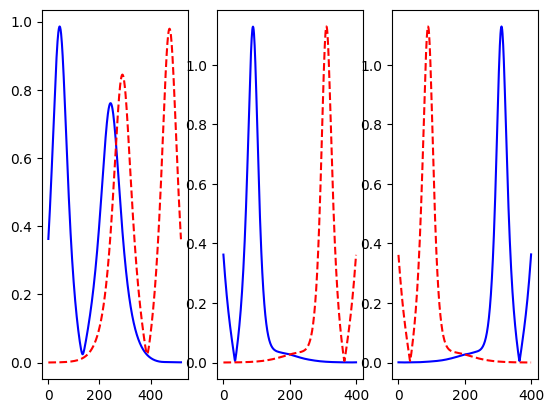

In [18]:
plt.subplot (1, 3, 1)
plt.plot (h1[0], 'b')
plt.plot (r11[-1], 'r--')

plt.subplot (1, 3, 2)
plt.plot (h1.T[0], 'b')
plt.plot (r11.T[-1], 'r--')

plt.subplot (1, 3, 3)
plt.plot (h1.T[-1], 'b')
plt.plot (r11.T[0], 'r--')

In [19]:
file1 = open ("cmkdv-3pos.txt", 'w')

In [20]:
u_p1, v_p1, r_p1 = num(X_star1[:, 0:1], X_star1[:, 1:2])

In [21]:
file1.write ("x t u v uN vN\n")
for i in range (len(X_star1)) :
    out = (str(X_star1[i, 0])+" "+str(X_star1[i, 1])+" "+str(u_p1[i, 0])+" "+str(v_p1[i, 0])+" "\
           +str(prediction[i, 0])+" "+str(prediction[i, 1])+"\n")
    file1.write (out)
    #print (out)

In [22]:
import pandas as pd
val_plot = pd.read_csv("cmkdv-3pos.txt", sep = " ")

In [23]:
print (val_plot)

               x    t         u         v        uN        vN
0      -9.500000 -9.5 -0.275806  0.233708 -0.277055  0.233620
1      -9.463391 -9.5 -0.285531  0.242494 -0.287194  0.242574
2      -9.426782 -9.5 -0.295494  0.251514 -0.297581  0.251768
3      -9.390173 -9.5 -0.305695  0.260769 -0.308216  0.261206
4      -9.353565 -9.5 -0.316135  0.270261 -0.319095  0.270886
...          ...  ...       ...       ...       ...       ...
207924  6.754335  9.5 -0.411288 -0.415056 -0.410231 -0.400284
207925  6.790944  9.5 -0.424386 -0.426880 -0.423596 -0.412036
207926  6.827553  9.5 -0.437624 -0.438792 -0.437132 -0.423899
207927  6.864162  9.5 -0.450980 -0.450771 -0.450817 -0.435855
207928  6.900771  9.5 -0.464431 -0.462792 -0.464628 -0.447878

[207929 rows x 6 columns]
